In [2]:
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Distributions")
Pkg.add("Turing")
Pkg.add("DiffEqBayes")
Pkg.add("ParameterizedFunctions")
Pkg.add("RecursiveArrayTools")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.to

In [4]:
using DifferentialEquations
# p[1] = delta
# p[2] = m_ktl
# p[3] = beta
# p[4] = km
function gfp!(du,u,p,t)
 du[1] = -p[1]*u[1]
 du[2] = p[2]*u[1]-(p[3]+p[4])*u[2]
 du[3] = p[4]*u[2]-p[3]*u[3]
end

gfp! (generic function with 1 method)

In [29]:
u0 = [1.0,0.0,0.0]
tspan = (0.0,30.0)
p = [0.08,4e4,0.04,0.3]
prob = ODEProblem(gfp!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 30.0)
u0: [1.0, 0.0, 0.0]

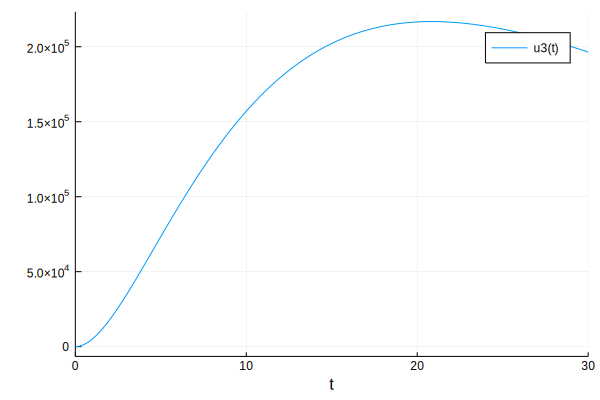

In [30]:
using Plots
sol = solve(prob)
plot(sol,vars=(0,3))

In [13]:
# p[1] = delta
# W = m_ktl
# p[3] = beta
# p[4] = km
function gfp_noise!(du,u,p,t,W)
 du[1] = -p[1]*u[1]
 du[2] = W*u[1]-(p[3]+p[4])*u[2]
 du[3] = p[4]*u[2]-p[3]*u[3]
end

gfp_noise! (generic function with 1 method)

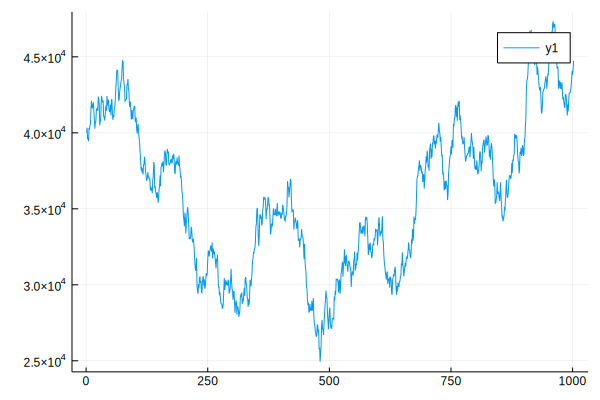

In [41]:
μ = 4e4
Θ = 0.02
σ = 0.3*sqrt(Θ)*μ
W = OrnsteinUhlenbeckProcess(Θ,μ,σ,0.0,μ)
probW = NoiseProblem(W,(0.0,100.0))
solW = solve(probW;dt=0.1)
plot(solW.u)

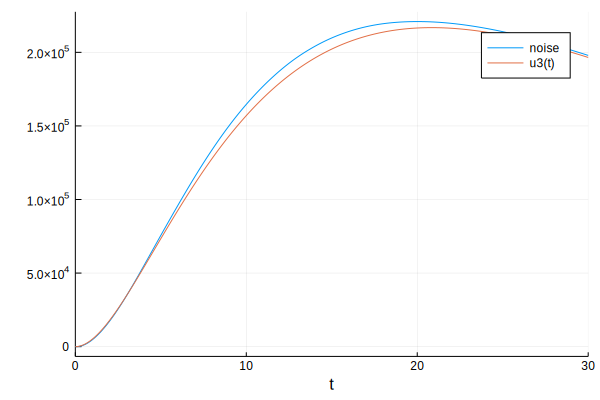

In [49]:
u0 = [1.0,0.0,0.0]
tspan = (0.0,30.0)
p = [0.08,4e4,0.04,0.3]
prob = RODEProblem(gfp_noise!,u0,tspan,p,noise=W)
sol_noise = solve(prob,RandomEM(),dt=1/10)
plot(sol_noise,vars=(0,3),label="noise")
plot!(sol,vars=(0,3))